<a href="https://colab.research.google.com/github/DanieelRC/RNyAP/blob/main/RodriguezCarreonDaniel_Retropropagacion_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenamiento de una red multicapa

En este ejercicio implementaremos el algoritmo de retropropagación dentro del descenso por gradiente para actualizar todos los pesos de la red durante varias épocas. Para entrenar la red usaremos el conjunto de datos de calificaciones que vimos previamente. Dicho conjunto tiene como vector de características la calificación del alumno en "gre", "gpa" y el "ranking de su preparatoria" y como valor objetivo esta su entrada a la universidad (como clase binaria).

@juan1rving



In [ ]:
#importamos paquetes y datos
import numpy as np
import nni.functions as functions
from data_prep import features, targets, features_test, targets_test

# Definiciones útiles
np.random.seed(21)

In [ ]:
# Analizando los datos
# Exploratory Data Analysis (EDA) for features
print("\nFeatures Summary Statistics:")
print(features.describe())

# Checking the distribution of target values
print("\nTarget Value Counts:")
print(targets.value_counts())


Features Summary Statistics:
              gre         gpa      rank_1      rank_2      rank_3      rank_4
count  360.000000  360.000000  360.000000  360.000000  360.000000  360.000000
mean     0.019430    0.002307    0.158333    0.366667    0.302778    0.172222
std      0.996139    0.988946    0.365561    0.482565    0.460099    0.378099
min     -3.183094   -2.968993    0.000000    0.000000    0.000000    0.000000
25%     -0.586063   -0.689498    0.000000    0.000000    0.000000    0.000000
50%     -0.066657    0.026539    0.000000    0.000000    0.000000    0.000000
75%      0.799020    0.736008    0.000000    1.000000    1.000000    0.000000
max      1.837832    1.603135    1.000000    1.000000    1.000000    1.000000

Target Value Counts:
admit
0    243
1    117
Name: count, dtype: int64


In [ ]:
# Número de unidades en la capa oculta
n_hidden = 2

# Hiperparámetros
epochs = 1500
learnrate = 0.0001

# Obtenemos el número de entradas (features) asi como el número de ejemplos (n_records)
n_records, n_features = features.shape

# Creamos las matrices de los pesos.
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)


## Entrenamiento

In [ ]:
#TODO (1 puntos): Completa el código para entrenar la red neuronal

last_loss = None
losses = []
# Algoritmo de descenso por gradiente
for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = functions.sigmoid(hidden_input)
        output = functions.sigmoid(np.dot(hidden_output, weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the error
        error = output - y

        # TODO: Calculate error term in output unit
        output_error = error * functions.sigmoid_prime(np.dot(hidden_output, weights_hidden_output))

        # TODO: propagate errors to hidden layer
        hidden_error = output_error * functions.sigmoid_prime(hidden_input)

        # TODO: Update the change in weights
        del_w_hidden_output += learnrate * output_error * hidden_output
        del_w_input_hidden += learnrate * np.outer(x, hidden_error)

    # TODO: Update weights
    weights_input_hidden -= del_w_input_hidden
    weights_hidden_output -= del_w_hidden_output

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = functions.sigmoid(np.dot(x, weights_input_hidden))
        out = functions.sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)
        losses.append(loss)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Despues de entrenar la red, vamos a ver como se comporta en el conjunto de test
hidden = functions.sigmoid(np.dot(features_test, weights_input_hidden))
out = functions.sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Exactitud sobre el conjunto de prueba: {:.3f}".format(accuracy))

Train loss:  0.2762007530778261
Train loss:  0.26150170341632334
Train loss:  0.25105385562603366
Train loss:  0.24364877122334486
Train loss:  0.23836973951460938
Train loss:  0.2345697112436871
Train loss:  0.23180497879233633
Train loss:  0.2297735754187179
Train loss:  0.22826937144770013
Train loss:  0.22715051167958902
Exactitud sobre el conjunto de prueba: 0.750


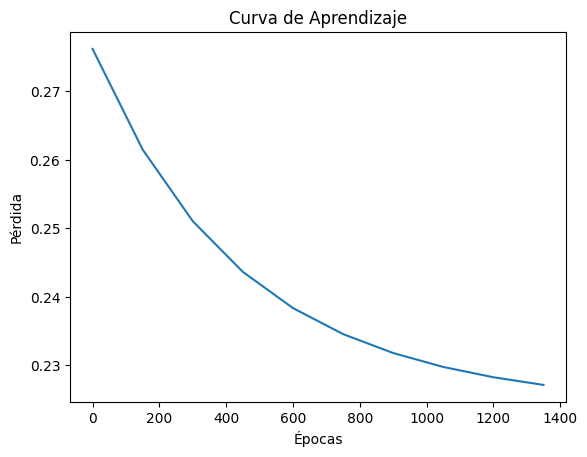

In [ ]:
# TODO (1 punto): Grafica la curva de aprendizaje (loss por época)

import matplotlib.pyplot as plt

plt.plot(np.arange(len(losses)) * (epochs / 10), losses)
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Aprendizaje')
plt.show()


## Conclusiones

Responde a las siguientes preguntas (1 punto):

- ¿La pedida de entrenamiento disminuye?
Cambiando por un "-" en lugar de un "+" en las líneas:
    weights_input_hidden -= del_w_input_hidden ,
    weights_hidden_output -= del_w_hidden_output ,
si que disminuye la perdida con las épocas.

- ¿Cuál es el mejor pérdida que alcanzaste? Menciona la cantidad de epocas y la tasa de aprendizaje usada.
Obtuve 0.22715051167958902 de perdida con 0.0001 de tasa de aprendizaje y 1500 épocas.
